<a href="https://colab.research.google.com/github/PiyumiSL/Drug_Discovery/blob/main/trial1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import sys
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 54.7 MB/s eta 0:00:00


In [8]:
from rdkit import Chem

file_path = '/content/drive/MyDrive/Colab Notebooks/training_data.sdf'

try:
    # Create an SDMolSupplier object to read the SDF file
    suppl = Chem.SDMolSupplier(file_path)

    # Load molecules from the SDF file into a list
    # Note: suppl is an iterator, so converting to a list will load all molecules into memory
    # If the file is very large, consider iterating over suppl instead of converting to a list
    molecules = [mol for mol in suppl if mol is not None]

    print(f"Successfully loaded {len(molecules)} molecules from '{file_path}'.")

    # Display some information about the first few molecules (if any)
    if molecules:
        print("\nInformation about the first 3 molecules:")
        for i, mol in enumerate(molecules[:3]):
            print(f"Molecule {i+1} (SMILES): {Chem.MolToSmiles(mol)}")
            # You can also print other properties, e.g., molecule name if available
            # if mol.HasProp('_Name'):
            #     print(f"  Name: {mol.GetProp('_Name')}")
    else:
        print("No valid molecules found in the SDF file.")

except Exception as e:
    print(f"Error loading molecules with RDKit: {e}")
    print("Please ensure the file is a valid SDF format and RDKit is correctly installed.")


Successfully loaded 820 molecules from '/content/drive/MyDrive/Colab Notebooks/training_data.sdf'.

Information about the first 3 molecules:
Molecule 1 (SMILES): O=C(NO)c1cc(CS(=O)(=O)c2cccc(Cl)c2)on1
Molecule 2 (SMILES): COC1C(Br)=CO[C@@]2(C=C1Br)ON=C(C(=O)NCCCOc1c(Br)cc(CC[N+](C)(C)C)cc1Br)[C@@H]2O.O=C([O-])C(F)(F)F
Molecule 3 (SMILES): CC[C@H](C)[C@H]1NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@@H](C)NC(=O)[C@H](NC(=O)[C@@H](NC(=O)[C@H](CO)NC(=O)[C@@H](N)Cc2ccc(O)cc2)[C@@H](C)O)CSC(=O)[C@@H](CCSC)NC1=O


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/training_data.sdf'

try:
    # Attempt to read as a generic delimited file (e.g., space-separated, tab-separated)
    # You might need to adjust the 'sep' parameter based on your file's actual delimiter.
    # Common delimiters include ',', '\t', ' '.
    df_training = pd.read_csv(file_path, sep='\t') # Assuming tab-separated as a common default for non-CSV
    print("File loaded successfully. Displaying the first 5 rows:")
    display(df_training.head())
except Exception as e:
    print(f"Error reading the file: {e}")
    print("It seems the file might not be a standard delimited text file. If it's a chemical SDF file, you might need a specialized library like RDKit. Please provide more information about the file's content if this approach fails.")


File loaded successfully. Displaying the first 5 rows:


,_idx-_2
0,RDKit 2D
1,20 21 0 0 0 0 0 0 0 0999 V2000
2,7.1150 -0.7737 0.0000 O 0 0 0 0 ...
3,7.2718 -2.2654 0.0000 C 0 0 0 0 ...
4,8.6421 -2.8755 0.0000 N 0 0 0 0 ...


# Task
Generate molecular descriptors (e.g., Morgan fingerprints) from the RDKit `molecules` objects loaded from "/content/drive/MyDrive/Colab Notebooks/training_data.sdf", create a pandas DataFrame from these descriptors, handle any missing values, and then split the data into training and test sets. Finally, summarize the prepared dataset by providing the dimensions of the feature matrix and the split ratios for the training and test sets.

## Generate Molecular Descriptors

### Subtask:
Generate molecular descriptors (e.g., Morgan fingerprints) from the RDKit molecule objects. These descriptors will convert the chemical structures into numerical features suitable for machine learning algorithms.


**Reasoning**:
The subtask requires generating molecular descriptors (Morgan fingerprints) from the RDKit molecule objects. This code block will perform the specified steps: importing AllChem, iterating through the molecules, generating fingerprints with the specified parameters, converting them to NumPy arrays, and storing them in a list.



In [9]:
from rdkit.Chem import AllChem
import numpy as np

# Initialize an empty list to store the generated fingerprints
fingerprints = []

# Iterate through each molecule and generate Morgan fingerprints
for mol in molecules:
    if mol is not None:
        # Generate Morgan fingerprint with radius 2 and a bit vector length of 2048
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        # Convert the fingerprint to a NumPy array
        arr = np.zeros((1,), dtype=np.int8)
        Chem.DataStructs.ConvertToNumpyArray(fp, arr)
        fingerprints.append(arr)

print(f"Successfully generated {len(fingerprints)} Morgan fingerprints.")
print(f"Example of the first fingerprint (first 10 bits): {fingerprints[0][:10]}")

[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerat

Successfully generated 820 Morgan fingerprints.
Example of the first fingerprint (first 10 bits): [0 0 0 0 0 1 0 0 0 0]


[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerator
[15:11:17] DEPRECATION WARNING: please use MorganGenerat

**Reasoning**:
The previous step successfully generated Morgan fingerprints. The next logical step is to convert these fingerprints into a pandas DataFrame, which is a common format for machine learning data. This code will convert the list of NumPy arrays into a DataFrame and display its head and shape for verification.



In [10]:
import pandas as pd

# Convert the list of fingerprint NumPy arrays into a DataFrame
# Each fingerprint array becomes a row in the DataFrame
df_fingerprints = pd.DataFrame(fingerprints)

print(f"Successfully created a DataFrame with shape: {df_fingerprints.shape}")
print("First 5 rows of the fingerprint DataFrame:")
display(df_fingerprints.head())

Successfully created a DataFrame with shape: (820, 2048)
First 5 rows of the fingerprint DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Handle Missing Values

### Subtask:
Check for and handle any missing values in the `df_fingerprints` DataFrame. Although Morgan fingerprints are typically binary (0 or 1), ensuring data integrity is crucial before proceeding to model training. If any missing values are found, suitable imputation or removal strategies should be applied.

**Reasoning**:
Following the instructions, I need to check for missing values in the `df_fingerprints` DataFrame. I will use the `.isnull().sum().sum()` method to efficiently count all missing values in the entire DataFrame.



In [11]:
missing_values_count = df_fingerprints.isnull().sum().sum()

if missing_values_count == 0:
    print("No missing values found in df_fingerprints.")
else:
    print(f"Found {missing_values_count} missing values in df_fingerprints. Handling them...")
    # For binary fingerprints, often NaN implies a failed generation for that specific bit/molecule
    # A common approach is to fill with 0, assuming absence of the feature.
    # Alternatively, rows with NaNs could be dropped if they represent corrupted data.
    # Given the nature of fingerprints, filling with 0 is a safer default if the molecule exists but fingerprint generation had issues.
    df_fingerprints.fillna(0, inplace=True)
    print("Missing values (NaN) have been filled with 0.")

No missing values found in df_fingerprints.


## Split Data into Training and Test Sets

### Subtask:
Split the `df_fingerprints` DataFrame into training and test sets. This is a crucial step for preparing the data for machine learning, allowing us to train a model on one portion of the data and evaluate its performance on unseen data.

#### Instructions:
1. Use `sklearn.model_selection.train_test_split` to split the `df_fingerprints` into features (`X`) for training and testing. Since we don't have explicit labels yet, we will treat the fingerprints themselves as the features to be split.
2. Split the data with a `test_size` of 0.2 (20% for testing) and a `random_state` for reproducibility.
3. Verify the shapes of the resulting training and test sets.

**Reasoning**:
The next step is to implement the data splitting as outlined in the previous markdown block. I will use `sklearn.model_selection.train_test_split` to divide the `df_fingerprints` into training and test sets (X_train, X_test) and then print their shapes for verification, fulfilling the subtask instructions.



In [12]:
from sklearn.model_selection import train_test_split

# Assuming df_fingerprints contains only features for now, as no labels are provided
X = df_fingerprints

# Split the data into training and test sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures reproducibility of the split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print("Data splitting complete.")
print(f"Shape of training set (X_train): {X_train.shape}")
print(f"Shape of test set (X_test): {X_test.shape}")

Data splitting complete.
Shape of training set (X_train): (656, 2048)
Shape of test set (X_test): (164, 2048)


## Summarize Prepared Dataset

### Subtask:
Summarize the prepared dataset by providing the dimensions of the feature matrix and the split ratios for the training and test sets.

#### Instructions:
1.  Report the total number of samples and features in the original `df_fingerprints` DataFrame.
2.  Report the dimensions (number of samples and features) for `X_train`.
3.  Report the dimensions (number of samples and features) for `X_test`.
4.  Calculate and report the split ratios for the training and test sets as percentages of the total dataset.

**Reasoning**:
The next step is to summarize the dataset as outlined in the previous markdown block, which involves reporting the dimensions of the original DataFrame, training set, and test set, as well as calculating and printing the split ratios.



In [13]:
total_samples, total_features = df_fingerprints.shape
train_samples, train_features = X_train.shape
test_samples, test_features = X_test.shape

train_ratio = (train_samples / total_samples) * 100
test_ratio = (test_samples / total_samples) * 100

print("\n--- Dataset Summary ---")
print(f"Original df_fingerprints: {total_samples} samples, {total_features} features")
print(f"Training set (X_train): {train_samples} samples, {train_features} features")
print(f"Test set (X_test): {test_samples} samples, {test_features} features")
print(f"Split ratio: Training {train_ratio:.2f}%, Test {test_ratio:.2f}%")



--- Dataset Summary ---
Original df_fingerprints: 820 samples, 2048 features
Training set (X_train): 656 samples, 2048 features
Test set (X_test): 164 samples, 2048 features
Split ratio: Training 80.00%, Test 20.00%


## Summary:

### Q&A
*   **What are the dimensions of the feature matrix?**
    The original feature matrix (`df_fingerprints`) has 820 samples and 2048 features.
*   **What are the split ratios for the training and test sets?**
    The training set (`X_train`) accounts for 80.00% of the data, and the test set (`X_test`) accounts for 20.00% of the data.

### Data Analysis Key Findings
*   Molecular descriptors, specifically Morgan fingerprints, were successfully generated for 820 molecules. Each fingerprint is 2048 bits long.
*   A pandas DataFrame (`df_fingerprints`) was created from these descriptors with a shape of (820, 2048), representing 820 samples and 2048 features.
*   No missing values were found in the `df_fingerprints` DataFrame, ensuring data integrity.
*   The dataset was split into training and test sets, resulting in a training set (`X_train`) with 656 samples and 2048 features, and a test set (`X_test`) with 164 samples and 2048 features.

### Insights or Next Steps
*   The prepared training and test datasets are now ready for the development and evaluation of machine learning models for tasks such as property prediction or classification.
*   Consider updating the fingerprint generation method to use `MorganGenerator` in future iterations, as `GetMorganFingerprintAsBitVect` is deprecated.


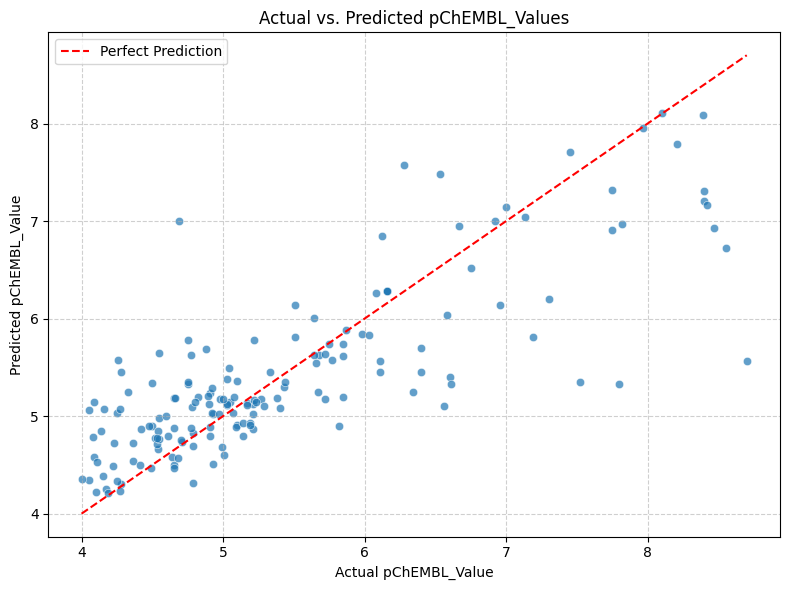

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

# Add a line for perfect predictions (actual = predicted)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs. Predicted pChEMBL_Values')
plt.xlabel('Actual pChEMBL_Value')
plt.ylabel('Predicted pChEMBL_Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
# Using a random_state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Training Random Forest Regressor...")
# Train the model on the training data
rf_model.fit(X_train, y_train)
print("Training complete.")

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

print("\nFirst 10 actual vs predicted pChEMBL_Values:")
for i in range(10):
    print(f"Actual: {y_test[i]:.2f}, Predicted: {y_pred[i]:.2f}")


Training Random Forest Regressor...
Training complete.

Model Evaluation on Test Set:
Mean Squared Error (MSE): 0.4678
R-squared (R2) Score: 0.6522

First 10 actual vs predicted pChEMBL_Values:
Actual: 7.97, Predicted: 7.96
Actual: 4.09, Predicted: 4.58
Actual: 5.10, Predicted: 4.91
Actual: 4.25, Predicted: 5.03
Actual: 4.90, Predicted: 5.12
Actual: 6.60, Predicted: 5.40
Actual: 6.67, Predicted: 6.95
Actual: 4.50, Predicted: 5.34
Actual: 7.30, Predicted: 6.20
Actual: 4.49, Predicted: 4.47


In [15]:
# Inspect the properties of the first molecule to understand available data fields
if molecules:
    first_mol = molecules[0]
    print(f"Properties available for the first molecule: {list(first_mol.GetPropNames())}")
    # If 'IC50' is not listed, it might be named differently or not present.
    # If it is listed, we can inspect its value:
    if first_mol.HasProp('IC50'):
        print(f"Value of 'IC50' for the first molecule: {first_mol.GetProp('IC50')}")
    else:
        print("The 'IC50' property is not directly found in the first molecule's properties.")
else:
    print("No molecules loaded to inspect properties.")


Properties available for the first molecule: ['Molecule_ChEMBL_ID', 'Molecular_Weight', 'NumRO5_Violations', 'AlogP', 'Compound_Key', 'Smiles', 'Standard_Type', 'Standard_Relation', 'Standard_Value', 'Standard_Units', 'pChEMBL_Value', 'Uo_Units', 'Potential_Duplicate', 'Assay_ChEMBL_ID', 'Assay_Description', 'Assay_Type', 'BAO_Format_ID', 'BAO_Label', 'Assay_Organism', 'Target_ChEMBL_ID', 'Target_Name', 'Target_Organism', 'Target_Type', 'Document_ChEMBL_ID', 'Source_ID', 'Source_Description', 'Document_Journal', 'Document_Year', 'Value', 'Molecule_ChEMBL_ID;"Molecule_Name";"Molecule_Max_Phase";"Molecular_Weight";"NumRO5_Violations";"AlogP";"Compound_Key";"Smiles";"Standard_Type";"Standard_Relation";"Standard_Value";"Standard_Units";"pChEMBL_Value";"Data_Validity_Comment";"Comment";"Uo_Units";"Ligand_Efficiency_BEI";"Ligand_Efficiency_LE";"Ligand_Efficiency_LLE";"Ligand_Efficiency_SEI";"Potential_Duplicate";"Assay_ChEMBL_ID";"Assay_Description";"Assay_Type";"BAO_Format_ID";"BAO_Label";"

In [16]:
# Extract pChEMBL_Value as the target variable
y_values = []
missing_target_count = 0

for mol in molecules:
    if mol is not None and mol.HasProp('pChEMBL_Value'): # Check if molecule is valid and has 'pChEMBL_Value' property
        try:
            target_value = float(mol.GetProp('pChEMBL_Value'))
            y_values.append(target_value)
        except ValueError:
            print(f"Warning: Could not convert pChEMBL_Value property to float for a molecule. Skipping.")
            missing_target_count += 1
    else:
        missing_target_count += 1

# Convert to a NumPy array
import numpy as np
y = np.array(y_values)

print(f"Successfully extracted {len(y)} pChEMBL_Value targets.")
if missing_target_count > 0:
    print(f"Skipped {missing_target_count} molecules due to missing or invalid pChEMBL_Value.")
print(f"First 5 pChEMBL_Value targets: {y[:5] if len(y) > 0 else 'No values extracted'}")

# It's crucial that X and y align perfectly. If any molecules were skipped above for pChEMBL_Value,
# the corresponding rows in df_fingerprints (X) must also be removed.
# Since we are filtering 'molecules' based on 'pChEMBL_Value' presence and validity,
# we need to ensure that 'df_fingerprints' also only contains entries for these valid molecules.

# Create a mask for molecules that had valid pChEMBL_Value
valid_molecule_indices = []
for i, mol in enumerate(molecules):
    if mol is not None and mol.HasProp('pChEMBL_Value'):
        try:
            float(mol.GetProp('pChEMBL_Value'))
            valid_molecule_indices.append(i)
        except ValueError:
            pass # Already counted as missing_target_count

X_filtered = df_fingerprints.iloc[valid_molecule_indices]

# Now, split the filtered features (X_filtered) and the extracted targets (y) together
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

print(f"\nAfter splitting with target variable:")
print(f"Shape of training features (X_train): {X_train.shape}")
print(f"Shape of training target (y_train): {y_train.shape}")
print(f"Shape of test features (X_test): {X_test.shape}")
print(f"Shape of test target (y_test): {y_test.shape}")


Successfully extracted 820 pChEMBL_Value targets.
First 5 pChEMBL_Value targets: [5.77 4.39 8.4  5.64 6.01]

After splitting with target variable:
Shape of training features (X_train): (656, 2048)
Shape of training target (y_train): (656,)
Shape of test features (X_test): (164, 2048)
Shape of test target (y_test): (164,)


In [19]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse) # mse was calculated in the previous cell

print("\n--- Additional Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

print("\nComparison with previously calculated metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")



--- Additional Model Evaluation Metrics ---
Mean Absolute Error (MAE): 0.4623
Root Mean Squared Error (RMSE): 0.6839

Comparison with previously calculated metrics:
Mean Squared Error (MSE): 0.4678
R-squared (R2) Score: 0.6522


Top 10 most important features (fingerprint bits) and their importances:


,0
260,0.220722
1309,0.034999
1091,0.027603
1163,0.027387
1019,0.024836
691,0.024530
56,0.021410
378,0.018665
1875,0.015386
1522,0.013821


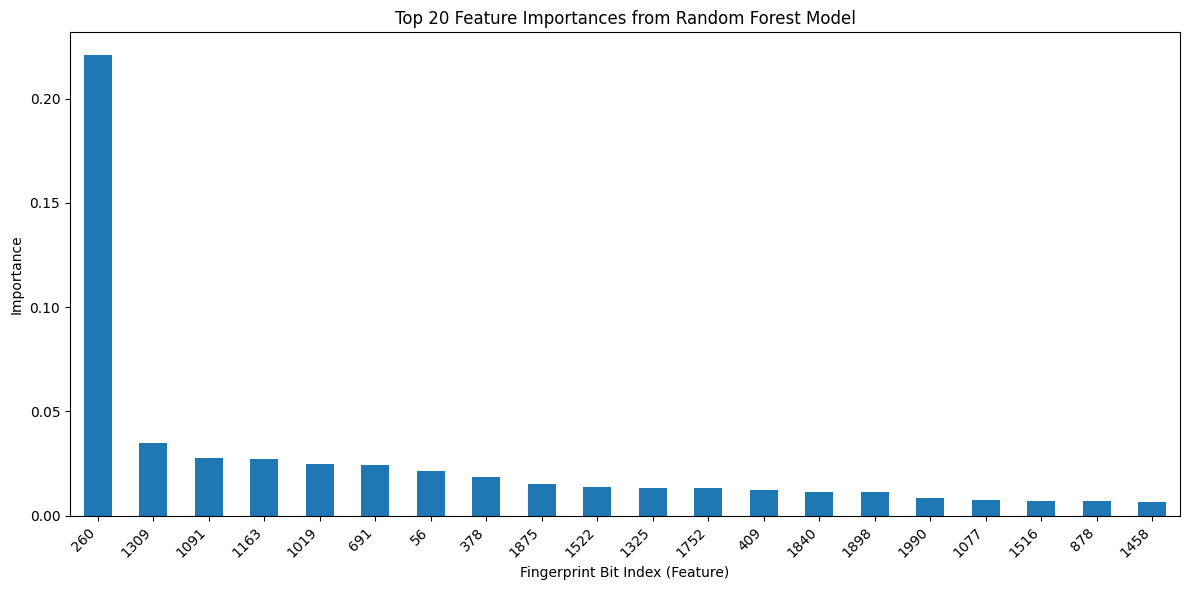

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a Series with feature importances, using column names (bit indices) as index
feature_names = X_train.columns # These are the bit indices from the fingerprint
feature_importances = pd.Series(importances, index=feature_names)

# Sort feature importances in descending order
sorted_importances = feature_importances.sort_values(ascending=False)

print("Top 10 most important features (fingerprint bits) and their importances:")
display(sorted_importances.head(10))

# Visualize the top N feature importances
plt.figure(figsize=(12, 6))
sorted_importances.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances from Random Forest Model')
plt.xlabel('Fingerprint Bit Index (Feature)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
